# CP 322 - Final Project

Aditya Chauhan (169027493)

## Introduction

### Dataset Choice

- [Student Performance Dataset](https://archive.ics.uci.edu/dataset/320/student+performance)

### Key Research Questions:

- Can external factors such as familial support, alcohol consumption, absences, and many others, predict student's academic success?
- If they can, which model can most accurately use the factors to make the prediction?

### Imports

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor


student_mat = pd.read_csv("Data/student-mat.csv", sep=";")
student_por = pd.read_csv("Data/student-por.csv", sep=";")

## Data Exploration

### Objective & Use Case

Student success is a cornerstone of educational systems, and identifying the drivers of academic performance is critical for improving outcomes. This project utilizes the Student Performance Dataset to develop a predictive model that analyzes the factors affecting final grades (G3). By addressing key questions—like the importance of early grades (G1, G2), the role of family support, and the impact of behavioral factors—this model provides practical tools for educators and administrators to allocate resources effectively and support at-risk students.

### Dataset Overview

Number of students in student-mat dataset: 395
Number of students in student-por dataset: 649

Missing Values in mat:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Summary Statistics of mat:
               age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240   

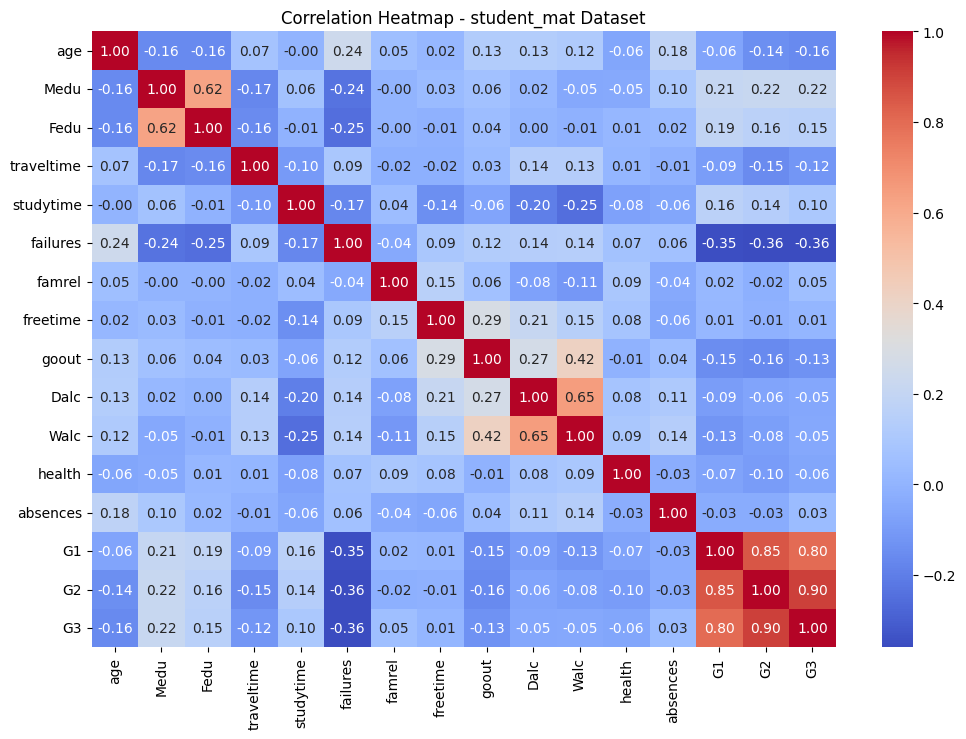

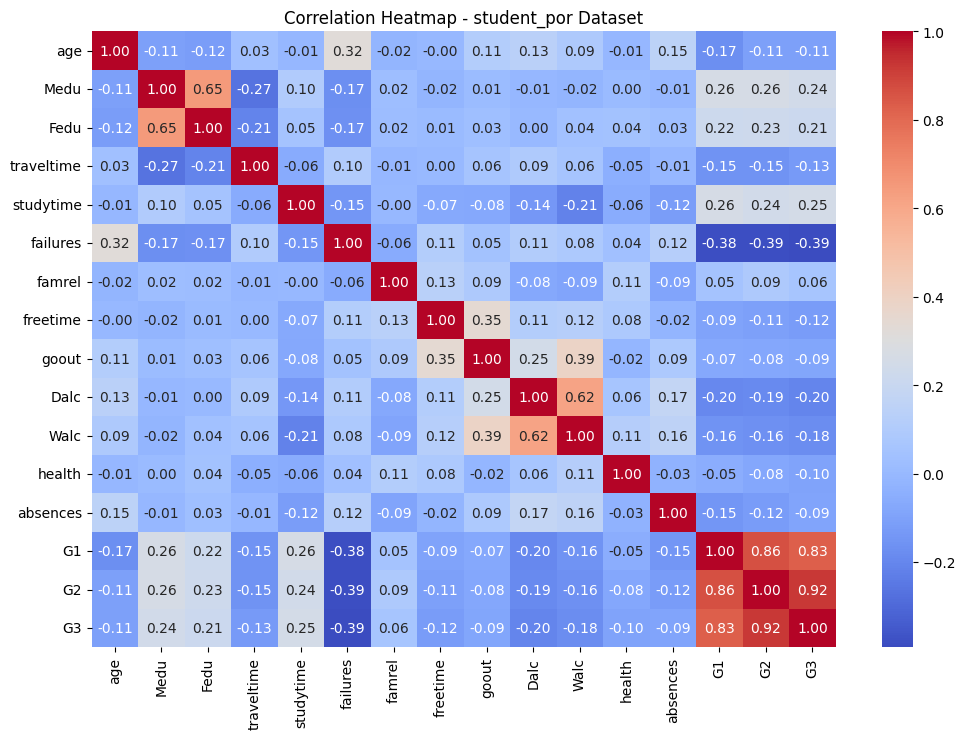

Advanced Overview for student-mat Dataset:

Numerical Summary:


,count,mean,std,min,25%,50%,75%,max,missing_values,unique_values
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0,0,8
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0,0,5
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0,0,5
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0,0,4
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0,0,4
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0,0,4
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0,0,5
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0,0,5
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0,0,5
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0,0,5



Categorical Summary:


,unique_values,missing_values,most_frequent_value
school,2,0,GP
sex,2,0,F
address,2,0,U
famsize,2,0,GT3
Pstatus,2,0,T
Mjob,5,0,other
Fjob,5,0,other
reason,4,0,course
guardian,3,0,mother
schoolsup,2,0,no


Advanced Overview for student-por Dataset:

Numerical Summary:


,count,mean,std,min,25%,50%,75%,max,missing_values,unique_values
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0,0,8
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0,0,5
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0,0,5
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0,0,4
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0,0,4
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0,0,4
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0,0,5
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0,0,5
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0,0,5
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0,0,5



Categorical Summary:


,unique_values,missing_values,most_frequent_value
school,2,0,GP
sex,2,0,F
address,2,0,U
famsize,2,0,GT3
Pstatus,2,0,T
Mjob,5,0,other
Fjob,5,0,other
reason,4,0,course
guardian,3,0,mother
schoolsup,2,0,no


Exploring G3 (Final Grade) in student-mat Dataset:


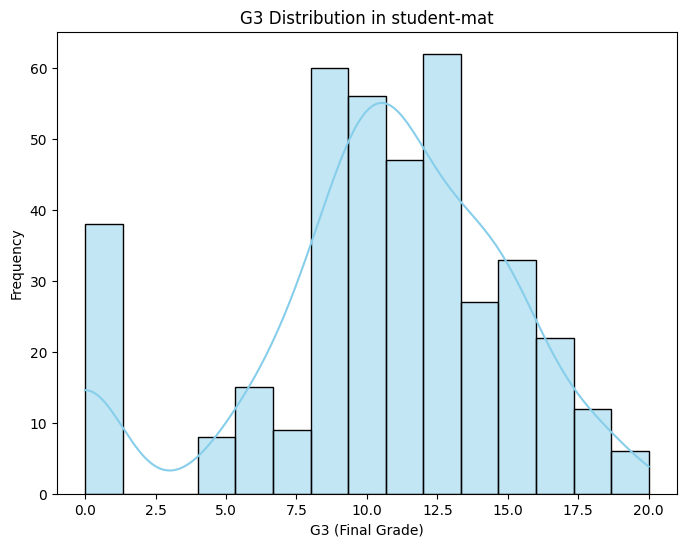

Exploring G3 (Final Grade) in student-por Dataset:


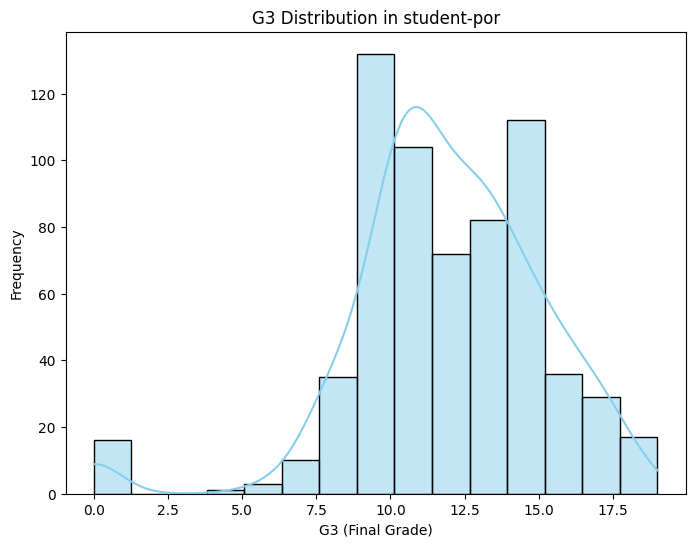

Feature Importance Exploration for student-mat Dataset:

Feature Importance:


,Feature,Importance
31,G2,0.738437
29,absences,0.154388
2,age,0.033211
10,reason,0.031903
13,studytime,0.010554
30,G1,0.007035
27,Walc,0.003385
24,freetime,0.002654
25,goout,0.002645
12,traveltime,0.001844


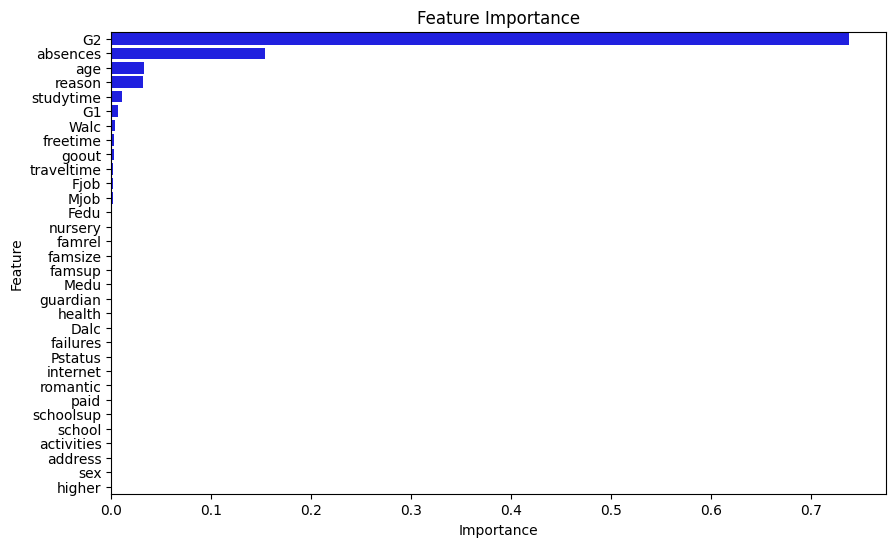

Feature Importance Exploration for student-por Dataset:

Feature Importance:


,Feature,Importance
31,G2,0.835501
29,absences,0.025762
25,goout,0.022148
1,sex,0.017793
0,school,0.016569
7,Fedu,0.015101
30,G1,0.010573
24,freetime,0.006153
19,nursery,0.005590
23,famrel,0.005279


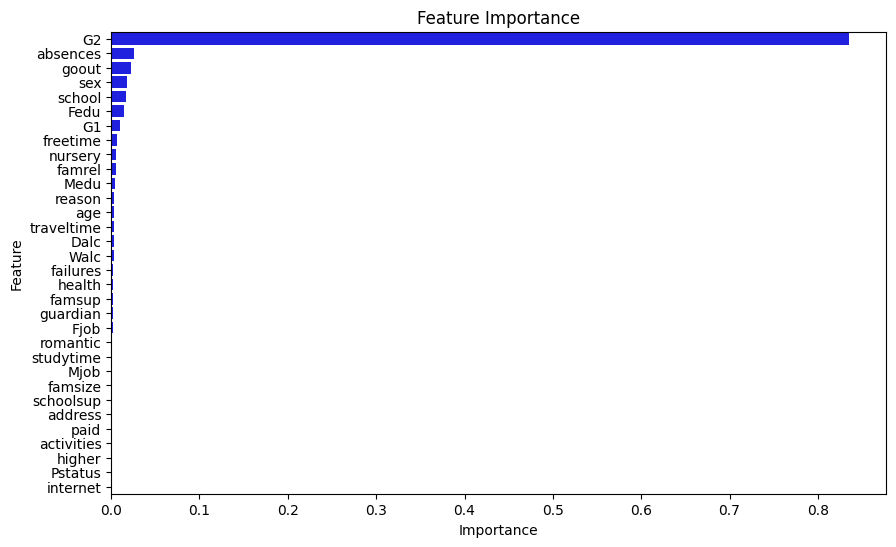

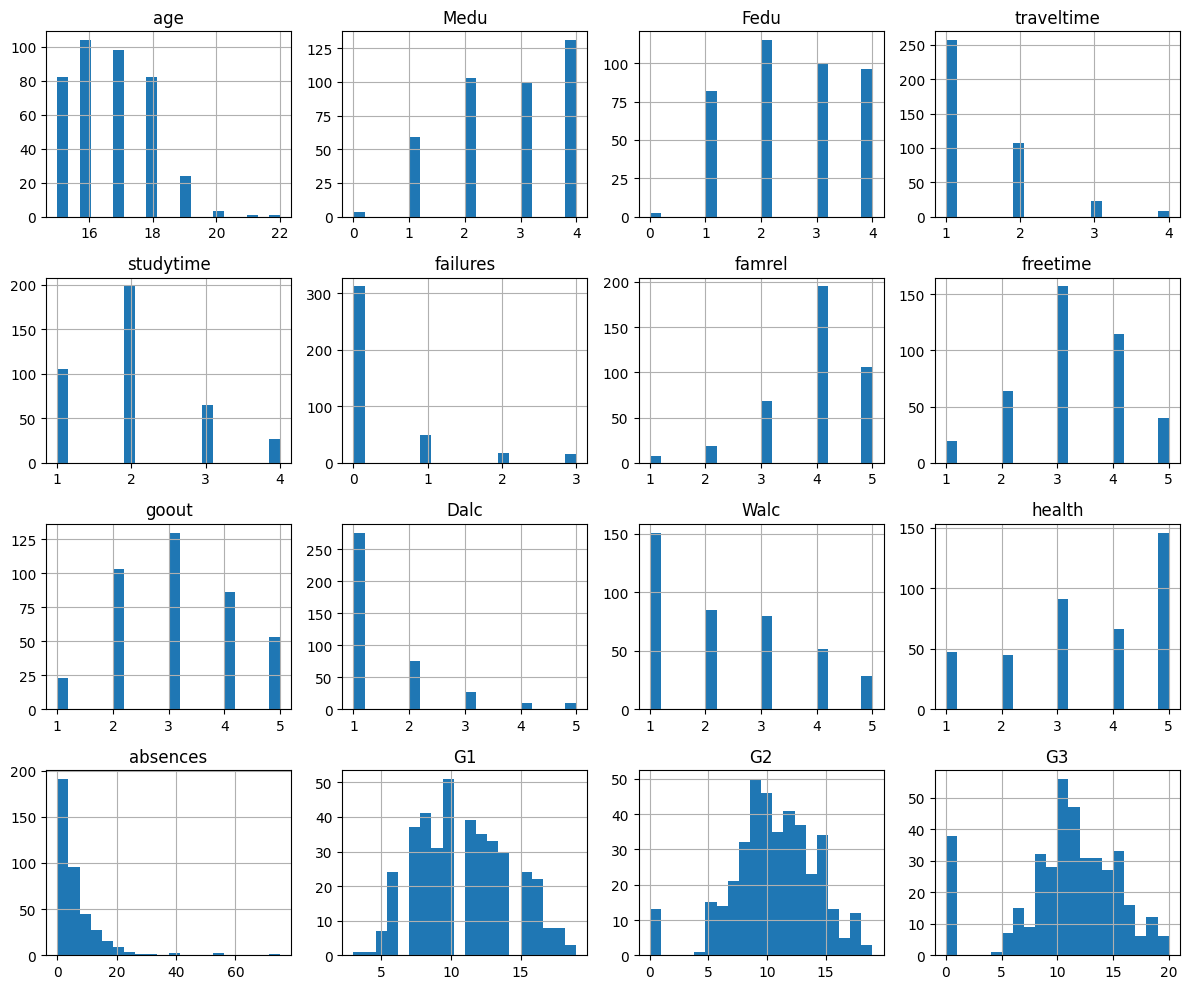

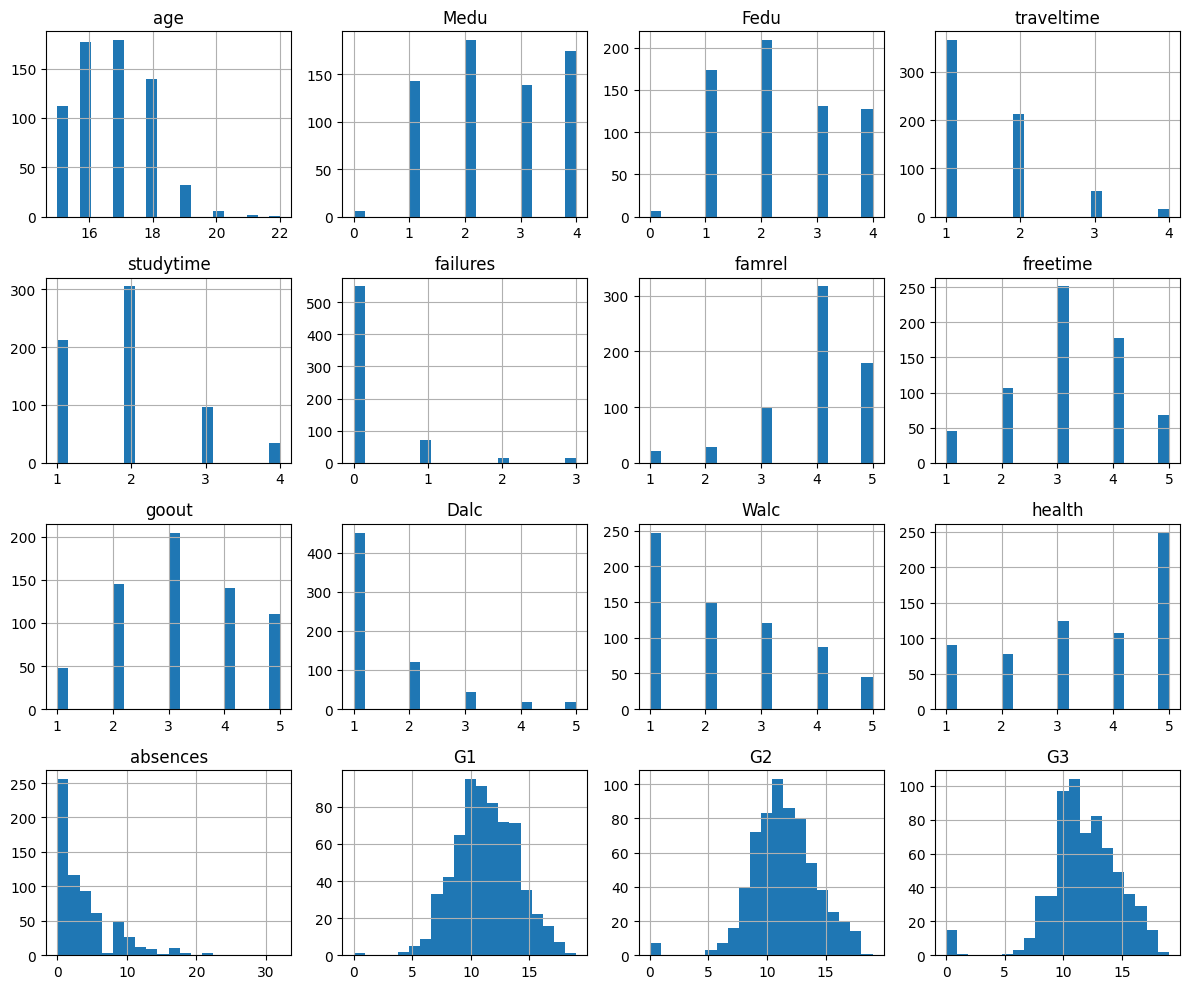

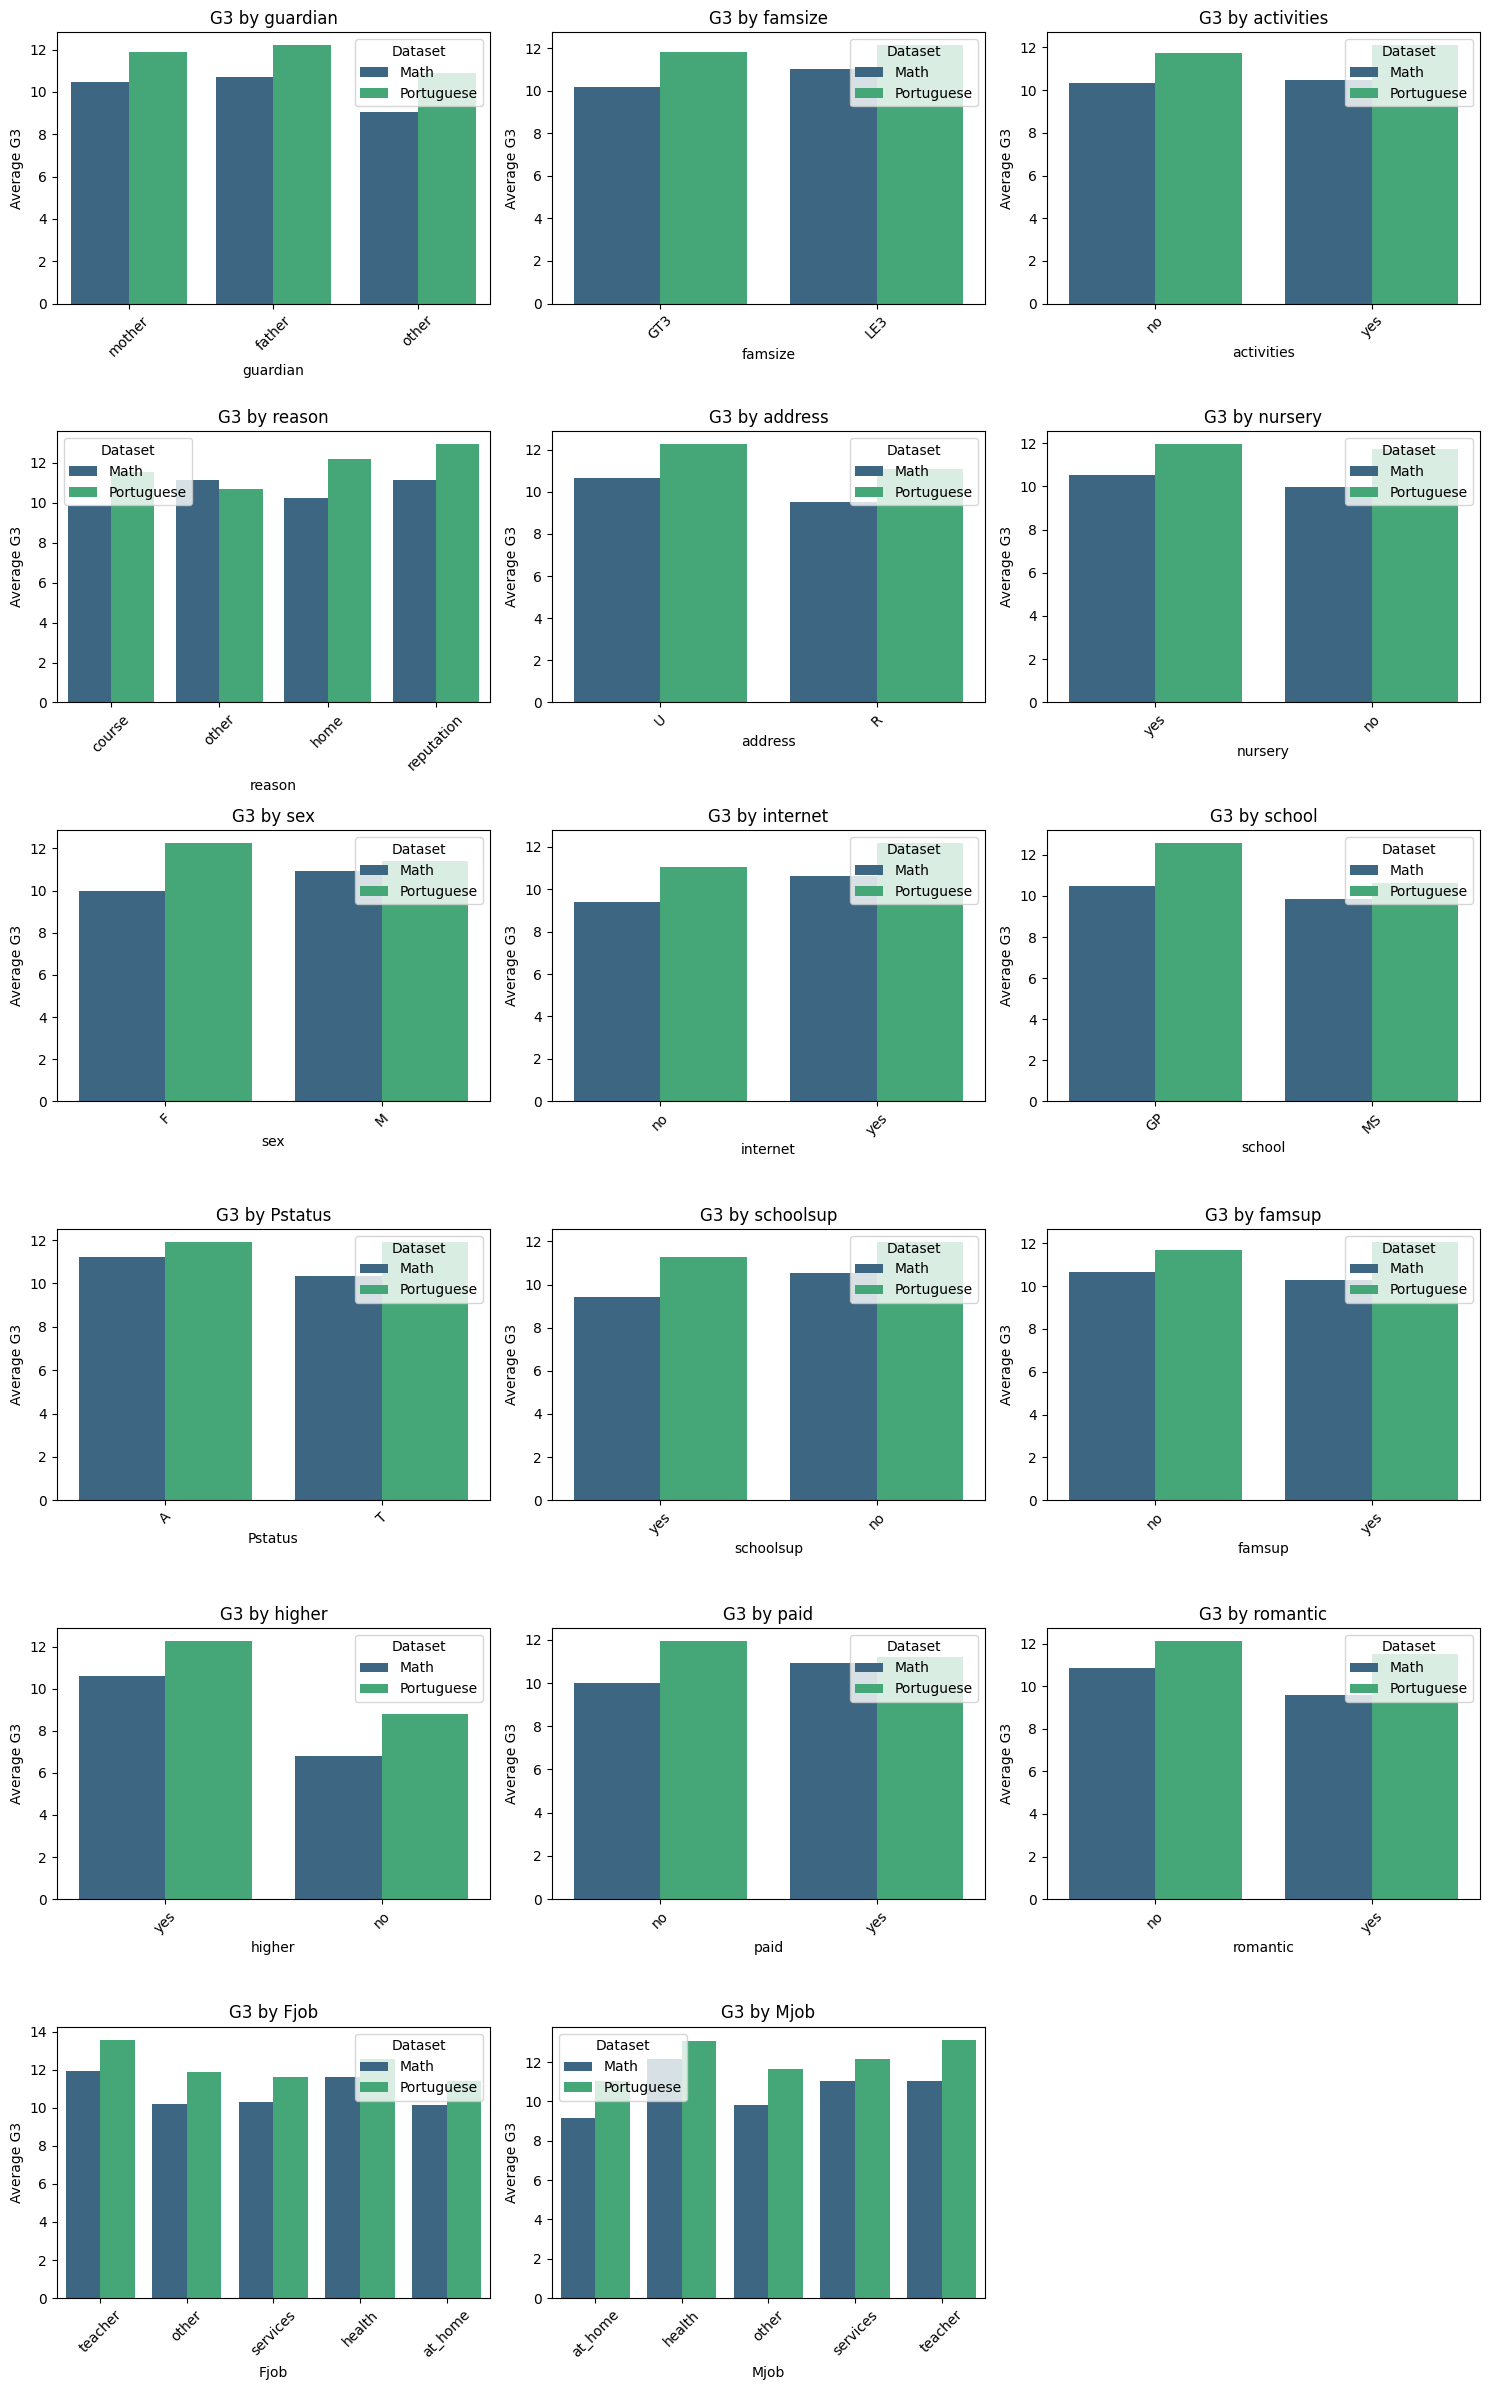

In [160]:
# Number of students in each dataset
print(f"Number of students in student-mat dataset: {len(student_mat)}")
print(f"Number of students in student-por dataset: {len(student_por)}")

# Missing value check
missing_values_mat = student_mat.isnull().sum()
missing_values_por = student_por.isnull().sum()

# Summary statistics for numerical columns
summary_stats_mat = student_mat.describe()
summary_stats_por = student_por.describe()

# Unique value counts for categorical columns
categorical_columns_mat = student_mat.select_dtypes(include=['object']).columns
unique_counts_mat = {col: student_mat[col].nunique() for col in categorical_columns_mat}
categorical_columns_por = student_por.select_dtypes(include=['object']).columns
unique_counts_por = {col: student_por[col].nunique() for col in categorical_columns_por}

print("\nMissing Values in mat:\n", missing_values_mat)
print("\nSummary Statistics of mat:\n", summary_stats_mat)
print("\nUnique Value Counts in mat:\n", unique_counts_mat)
print("\nMissing Values in por:\n", missing_values_por)
print("\nSummary Statistics of por:\n", summary_stats_por)
print("\nUnique Value Counts in por:\n", unique_counts_por)

# Select only numeric columns
numeric_cols_mat = student_mat.select_dtypes(include=['number'])
numeric_cols_por = student_por.select_dtypes(include=['number'])

# Correlation matrix for student_mat
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols_mat.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap - student_mat Dataset")
plt.show()

# Correlation matrix for student_por
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols_por.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap - student_por Dataset")
plt.show()

# Advanced Tabular Overview
def advanced_tabular_overview(df):
    # Summary of numerical columns
    numerical_summary = df.describe().transpose()
    numerical_summary['missing_values'] = df.isnull().sum()
    numerical_summary['unique_values'] = df.nunique()
    
    # Summary of categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_summary = pd.DataFrame({
        "unique_values": [df[col].nunique() for col in categorical_cols],
        "missing_values": [df[col].isnull().sum() for col in categorical_cols],
        "most_frequent_value": [df[col].mode()[0] if not df[col].mode().empty else None for col in categorical_cols],
    }, index=categorical_cols)
    
    print("\nNumerical Summary:")
    display(numerical_summary)
    print("\nCategorical Summary:")
    display(categorical_summary)

print("Advanced Overview for student-mat Dataset:")
advanced_tabular_overview(student_mat)

print("Advanced Overview for student-por Dataset:")
advanced_tabular_overview(student_por)

# Target Variable Exploration - G3
def explore_target_variable(df, dataset_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(df['G3'], bins=15, kde=True, color="skyblue", edgecolor="black")
    plt.title(f"G3 Distribution in {dataset_name}")
    plt.xlabel("G3 (Final Grade)")
    plt.ylabel("Frequency")
    plt.show()

print("Exploring G3 (Final Grade) in student-mat Dataset:")
explore_target_variable(student_mat, "student-mat")

print("Exploring G3 (Final Grade) in student-por Dataset:")
explore_target_variable(student_por, "student-por")

# Feature Importance Exploration Function
def feature_importance_exploration(df, target_col):
    # Prepare data
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Encode categorical features column-wise
    label_encoders = {}
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # Store the encoder in case you need it later
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit decision tree
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Feature importance
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    print("\nFeature Importance:")
    display(importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance, x='Importance', y='Feature', color='b')
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

print("Feature Importance Exploration for student-mat Dataset:")
feature_importance_exploration(student_mat, 'G3')

print("Feature Importance Exploration for student-por Dataset:")
feature_importance_exploration(student_por, 'G3')

student_mat.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

student_por.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

X = student_mat.drop(columns=['G3'])
y = student_mat['G3']

# Identify overlapping categorical features
overlapping_categorical_features = list(
    set(student_mat.select_dtypes(include='object').columns) &
    set(student_por.select_dtypes(include='object').columns)
)

# Create bar plots for overlapping categorical features
num_cols = 3  # Number of columns in the plot grid
num_rows = -(-len(overlapping_categorical_features) // num_cols)  # Calculate rows needed

plt.figure(figsize=(5 * num_cols, 4 * num_rows))  # Adjust figure size for grid

for i, feature in enumerate(overlapping_categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    combined_data = pd.concat([
        student_mat[[feature, 'G3']].assign(Dataset='Math'),
        student_por[[feature, 'G3']].assign(Dataset='Portuguese')
    ])
    sns.barplot(
        data=combined_data,
        x=feature,
        y='G3',
        hue='Dataset',
        errorbar=None,  # Updated to handle Seaborn's future versions
        palette="viridis"
    )
    plt.title(f"G3 by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Average G3")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()